In [1]:
import pandas as pd
import numpy as np

In [2]:
import warnings
warnings.filterwarnings("ignore")
pd.options.display.max_columns = None

#### indiv22

In [3]:
# Dataset description:
# https://www.opensecrets.org/resources/datadictionary/Data%20Dictionary%20for%20Individual%20Contribution%20Data.htm
columns_campfin22_indivs22 = ['cycle', 'fectransid', 'contribid', 'contrib_last', 'contrib_first', 'recipid', 'orgname', 
                    'ultorg', 'realcode', 'date', 'amount', 'street', 'city', 'state',
                    'zip', 'recipcode', 'type', 'cmteid', 'otherid', 'gender', 'microfilm',
                    'occupation', 'employer', 'source']

columns_campfin22_indivs22 = dict(enumerate(columns_campfin22_indivs22))

# This dataset is huge, and crashes my computer. For now, limiting to 1000000 rows
# until a better way is found to trim off this dataset to only the last cycle or two.
df_indivs22 = pd.read_csv('../../data/open_secrets/CampaignFin22/indivs22.csv', nrows=1000000, on_bad_lines='skip', sep=',', header=None, na_values=['N/A', 'NA'], encoding='ISO-8859-1')
df_indivs22 = df_indivs22.rename(columns=columns_campfin22_indivs22)

# Get rid of the pipes on both sides of the data.
df_indivs22 = df_indivs22.applymap(lambda x: x.replace('|', '') if type(x) == str else x)

# Other cleanup.
df_indivs22['cycle'] = df_indivs22['cycle'].apply(lambda x: int(x))
df_indivs22['fectransid'] = df_indivs22['fectransid'].apply(lambda x: int(x))
df_indivs22['date'] = df_indivs22['date'][:9]
df_indivs22['date'] = pd.to_datetime(df_indivs22['date'], format='%m/%d/%Y')

df_indivs22.head()

,cycle,fectransid,contribid,contrib_last,contrib_first,recipid,orgname,ultorg,realcode,date,amount,street,city,state,zip,recipcode,type,cmteid,otherid,gender,microfilm,occupation,employer,source
0,2022,4061520221505841534,r0014256510,DILLARD,DANIEL,C00000935,[24T Contribution],,Z9500,2021-08-29,35,,HIDALGO,TX,78557,DP,24T,C00401224,C00000935,M,202205149504021121,NOT EMPLOYED,NOT EMPLOYED,Rept
1,2022,4061520221505841535,r0015503614,WHITE,SCOTTO,C00633404,[24T Contribution],,Z9500,2021-08-29,15,,YONKERS,NY,10701,PI,24T,C00401224,C00633404,M,202205149507911003,NOT EMPLOYED,NOT EMPLOYED,Rept
2,2022,4061520221505841536,p0003861308,DOMINGUEZ,SALLIE,C00632398,[24T Contribution],,Z9500,2021-08-29,10,,CAMPBELL,CA,95011,PI,24T,C00401224,C00632398,F,202205149504046504,HEALTHCARE,MCDONALD FAMILY DENTAL,Rept
3,2022,4061520221505841543,p0003689535,BRADLEY,JANNETTE,C00678839,[24T Contribution],,Z9500,2021-08-29,26,,OAK LAWN,IL,60453,PI,24T,C00401224,C00678839,F,202205149503347140,LIBRARIAN,MEDICAL CENTER,Rept
4,2022,4061520221505841545,q0002181378,BHATT,TANYA,C00580068,[24T Contribution],,Z9500,2021-08-29,50,,MIAMI BEACH,FL,33141,PI,24T,C00401224,C00580068,F,202205149503225635,MKTG,FRYE FINANCIAL,Rept


#### cmtes22

In [4]:
# Dataset description:
# https://www.opensecrets.org/resources/datadictionary/Data%20Dictionary%20for%20Cmtes.htm
columns_campfin22_cmtes22 = ['cycle', 'cmteid', 'pacshort', 'affiliate', 'ultorg', 'recipid', 
                    'recipcode', 'feccandid', 'party', 'primcode', 'source', 'sensitive',
                    'foreign', 'active']

columns_campfin22_cmtes22 = dict(enumerate(columns_campfin22_cmtes22))

df_cmtes22 = pd.read_csv('../../data/open_secrets/CampaignFin22/cmtes22.csv', on_bad_lines='skip', sep=',', header=None, na_values=['N/A', 'NA'])
df_cmtes22 = df_cmtes22.rename(columns=columns_campfin22_cmtes22)

# Get rid of the pipes on both sides of the data.
df_cmtes22 = df_cmtes22.applymap(lambda x: x.replace('|', '') if type(x) == str else x)

# Other cleanup.
df_cmtes22['cycle'] = df_cmtes22['cycle'].apply(lambda x: int(x))
df_cmtes22['foreign'] = df_cmtes22['foreign'].apply(lambda x: int(x))
df_cmtes22['active'] = df_cmtes22['active'].apply(lambda x: int(x))

df_cmtes22.head()

,cycle,cmteid,pacshort,affiliate,ultorg,recipid,recipcode,feccandid,party,primcode,source,sensitive,foreign,active
0,2022,C00000059,Hallmark Cards,NaN,Hallmark Cards,C00000059,PB,NaN,NaN,C1400,WAA21,Y,0,1
1,2022,C00000422,American Medical Assn,American Medical Assn,American Medical Assn,C00000422,PB,NaN,NaN,H1100,WAA21,n,0,1
2,2022,C00000489,Teamsters Local 886,Teamsters Union,Teamsters Union,C00000489,PL,NaN,,LT300,WAA21,n,0,1
3,2022,C00000547,KANSAS MEDICAL SOCIETY POLITICAL ACTION COMMIT...,NaN,NaN,C00000547,NaN,NaN,U,NaN,NaN,NaN,0,0
4,2022,C00000729,American Dental Assn,American Dental Assn,American Dental Assn,C00000729,PB,NaN,NaN,H1400,WAA21,n,0,1


#### cmtes527

In [5]:
# Dataset description:
# https://www.opensecrets.org/resources/datadictionary/Data%20Dictionary%20527%20Cmtes.htm
columns_cmtes527 = ['cycle', 'rpt', 'ein', 'crp527name', 'affiliate', 'ultorg', 
                    'recipcode', 'cmteid', 'cid', 'eccmteid', 'party', 
                    'primcode', 'source', 'ffreq', 'ctype', 'csource', 'viewpt',
                    'comments', 'state']

columns_cmtes527 = dict(enumerate(columns_cmtes527))

df_cmtes527 = pd.read_csv('../../data/open_secrets/527/cmtes527.csv', on_bad_lines='skip', sep=',', header=None, na_values=['N/A', 'NA'])
df_cmtes527 = df_cmtes527.rename(columns=columns_cmtes527)

# Get rid of the pipes on both sides of the data.
df_cmtes527 = df_cmtes527.applymap(lambda x: x.replace('|', '') if type(x) == str else x)

# Other cleanup.
df_cmtes527['cycle'] = df_cmtes527['cycle'].apply(lambda x: int(x))
df_cmtes527['ein'] = df_cmtes527['ein'].apply(lambda x: int(x))

df_cmtes527.head()

,cycle,rpt,ein,crp527name,affiliate,ultorg,recipcode,cmteid,cid,eccmteid,party,primcode,source,ffreq,ctype,csource,viewpt,comments,state
0,2002,Q302,861006189,American Electronics Assn,,American Electronics Assn,PB,,,,NaN,C5000,WebPN,Q,F,NaN,N,,AZ
1,2008,Q308,262108560,California 2008 GOP Delegation Corporate,,California 2008 GOP Delegation,RP,,,,R,Z5100,Name,Q,F,,C,,CA
2,2000,Q400,912101097,Alabama League of Environmental Action,,Alabama League of Environmental Action,PI,,,,NaN,JE300,Name,Q,S,Name,L,,AL
3,2012,Q412,522257109,International Brotherhood of Electrical Workers,,International Brotherhood of Electrical Workers,PL,C00027342,,,,LC150,PAC,Q,F,Name,L,,DC
4,2008,Q407,900049259,Pacific Northwest Regional Council of Carpenters,,Carpenters & Joiners Union,PL,C00001016,,C70004205,,LB100,PAC,Q,F,Expen,L,,WA


#### cands22

In [6]:
# Dataset description:
# https://www.opensecrets.org/resources/datadictionary/Data%20Dictionary%20Candidates%20Data.htm
columns_campfin22_cands22 = ['cycle', 'feccandid', 'cid', 'firstlastp', 'party', 'distidrunfor', 
                    'distidcurr', 'currcand', 'cyclecand', 'crpico', 'recipcode', 
                    'nopacs']

columns_campfin22_cands22 = dict(enumerate(columns_campfin22_cands22))

df_cands22 = pd.read_csv('../../data/open_secrets/CampaignFin22/cands22.csv', on_bad_lines='skip', sep=',', header=None, na_values=['N/A', 'NA'])
df_cands22 = df_cands22.rename(columns=columns_campfin22_cands22)

# Get rid of the pipes on both sides of the data.
df_cands22 = df_cands22.applymap(lambda x: x.replace('|', '') if type(x) == str else x)

# Other cleanup.
df_cands22['cycle'] = df_cands22['cycle'].apply(lambda x: int(x))

df_cands22.head()

,cycle,feccandid,cid,firstlastp,party,distidrunfor,distidcurr,currcand,cyclecand,crpico,recipcode,nopacs
0,2022,H0AK00105,N00039029,Thomas Lamb (3),3,AK01,,,,,3N,
1,2022,H0AL01055,N00044245,Jerry Carl (R),R,AL01,AL01,Y,Y,I,RW,
2,2022,H0AL01063,N00044288,Wes Lambert (R),R,AL01,,,,,RN,
3,2022,H0AL01097,N00044750,James Averhart (D),D,AL01,,,,,DN,
4,2022,H0AL02087,N00030768,Martha Roby (R),R,AL02,,,,,RN,


#### pac_other22

In [177]:
# Dataset description:
# https://www.opensecrets.org/resources/datadictionary/Data%20Dictionary%20PAC%20to%20PAC%20Data.htm
columns_campfin22_pac_other22 = ['cycle', 'fecrecno', 'filerid', 'donorcmte', 'contriblendtrans', 'city', 'state', 
                            'zip', 'fecoccemp', 'primcode', 'date', 'amount', 'recipid', 'party', 'otherid',
                            'recipcode', 'recipprimcode', 'amend', 'report', 'pg', 'microfilm', 'type',
                            'realcode', 'source']

columns_campfin22_pac_other22 = dict(enumerate(columns_campfin22_pac_other22))

df_pac_other22 = pd.read_csv('../../data/open_secrets/CampaignFin22/pac_other22.csv', on_bad_lines='skip', sep=',', header=None, na_values=['N/A', 'NA'])
df_pac_other22 = df_pac_other22.rename(columns=columns_campfin22_pac_other22)

# Get rid of the pipes on both sides of the data.
df_pac_other22 = df_pac_other22.applymap(lambda x: x.replace('|', '') if type(x) == str else x)

# Other cleanup.
df_pac_other22['cycle'] = df_pac_other22['cycle'].apply(lambda x: int(x))
df_pac_other22['fecrecno'] = df_pac_other22['fecrecno'].apply(lambda x: int(x))

df_pac_other22['date'] = pd.to_datetime(df_pac_other22['date'], format='%m/%d/%Y', errors='coerce')
df_pac_other22 = df_pac_other22.dropna(subset=['date'])

df_pac_other22['microfilm'] = df_pac_other22['microfilm'].fillna(0)
df_pac_other22['microfilm'] = df_pac_other22['microfilm'].apply(lambda x: 0 if x == '' else int(x))
                                                                                                
df_pac_other22.head()                                                                                                

,cycle,fecrecno,filerid,donorcmte,contriblendtrans,city,state,zip,fecoccemp,primcode,date,amount,recipid,party,otherid,recipcode,recipprimcode,amend,report,pg,microfilm,type,realcode,source
0,2022,1011320230265253021,C00032979,Teamsters Union,BOHANNAN VICTORY FUND,IOWA CITY,IA,52245,NaN,LT300,2022-11-15,-1000.0,C00811059,D,C00811059,DP,Z4200,A,30G,P,202212089550408190,24K,LT300,PAC
1,2022,1011320230265254787,C00032979,Teamsters Union,WARNOCK VICTORY FUND,WASHINGTON,DC,20003,NaN,LT300,2022-11-22,15000.0,C00740597,D,C00740597,DP,Z4200,A,30G,P,202212089550408210,24K,LT300,PAC
2,2022,1011320230265254797,C00032979,Teamsters Union,BLUE POWER PAC,COLLINSWOOD,NJ,08108,NaN,LT300,2022-11-03,5000.0,C00575894,D,C00575894,PI,J2100,A,30G,P,202212089550408207,24K,LT300,PAC
3,2022,1011320230265254799,C00032979,Teamsters Union,COMMONWEALTH PAC,MERRIFIELD,VA,22116,NaN,LT300,2022-11-03,5000.0,C00498931,D,C00498931,PI,J2100,A,30G,P,202212089550408208,24K,LT300,PAC
4,2022,1011320230265254826,C00032979,Teamsters Union,RHODE ISLAND DEMOCRATIC STATE CMTE,PROVIDENCE,RI,92940,NaN,LT300,2022-11-03,5000.0,C00136200,D,C00136200,DP,Z5200,A,30G,P,202212089550408209,24K,LT300,PAC


In [105]:
len(df_pac_other22)

1014003

### PACs to Candidates

In [9]:
# First, join df1 and df2 on 'id' with an inner join
df_cmtes_merged = pd.merge(df_cmtes22, df_cmtes527, on='cmteid', how='inner')
df_cmtes_merged.head()

# # Then, join the result with df3 on 'id' with an inner join
df_cmtes_cands = pd.merge(df_cmtes_merged, df_cands22, on='cid', how='inner')
df_cmtes_cands.head()

,cycle_x,cmteid,pacshort,affiliate_x,ultorg_x,recipid,recipcode_x,feccandid_x,party_x,primcode_x,source_x,sensitive,foreign,active,cycle_y,rpt,ein,crp527name,affiliate_y,ultorg_y,recipcode_y,cid,eccmteid,party_y,primcode_y,source_y,ffreq,ctype,csource,viewpt,comments,state,cycle,feccandid_y,firstlastp,party,distidrunfor,distidcurr,currcand,cyclecand,crpico,recipcode,nopacs
0,2022,C00351056,Progress PAC ...,Nydia Velazquez (D-NY),Progress PAC ...,C00351056,PI,NaN,D,J2100,Rept,N,0,1,2002,Q102,522204162,Velazquez Victory Fund Non-Federal,Nydia M. Velazquez (D-NY),Velazquez Victory Fund,PI,N00001102,,D,J2100,PAC,Q,S,Rept,L,,DC,2022,H2NY00010,Nydia Velazquez (D),D,NY07,NY07,Y,Y,I,DW,
1,2022,C00351056,Progress PAC ...,Nydia Velazquez (D-NY),Progress PAC ...,C00351056,PI,NaN,D,J2100,Rept,N,0,1,2002,Q401,522204162,Velazquez Victory Fund Non-Federal,Nydia M. Velazquez (D-NY),Velazquez Victory Fund,PI,N00001102,,D,J2100,PAC,Q,S,Rept,L,,DC,2022,H2NY00010,Nydia Velazquez (D),D,NY07,NY07,Y,Y,I,DW,
2,2022,C00351056,Progress PAC ...,Nydia Velazquez (D-NY),Progress PAC ...,C00351056,PI,NaN,D,J2100,Rept,N,0,1,2002,Q202,522204162,Velazquez Victory Fund Non-Federal,Nydia M. Velazquez (D-NY),Velazquez Victory Fund,PI,N00001102,,D,J2100,PAC,Q,S,Rept,L,,DC,2022,H2NY00010,Nydia Velazquez (D),D,NY07,NY07,Y,Y,I,DW,
3,2022,C00363770,PETE PAC,ex-Rep. Pete Sessions (R-Texas),PETE PAC,C00363770,PI,H2TX03126,R,J2400,Rept,n,0,1,2002,Q202,542016491,People for Enterprise/Trade/Econ Growth,Pete Sessions (R-Texas),People for Enterprise/Trade/Econ Growth,PI,N00005681,,R,J2200,PAC,Q,U,NaN,C,,VA,2022,H2TX03126,Pete Sessions (R),R,TX17,TX17,Y,Y,I,RW,
4,2022,C00363770,PETE PAC,ex-Rep. Pete Sessions (R-Texas),PETE PAC,C00363770,PI,H2TX03126,R,J2400,Rept,n,0,1,2002,Q102,542016491,People for Enterprise/Trade/Econ Growth,Pete Sessions (R-Texas),People for Enterprise/Trade/Econ Growth,PI,N00005681,,R,J2200,PAC,Q,U,NaN,C,,VA,2022,H2TX03126,Pete Sessions (R),R,TX17,TX17,Y,Y,I,RW,


In [10]:
df_network = df_cmtes_cands[['cmteid', 'pacshort', 'cid']].drop_duplicates()
df_network = df_network.reset_index(drop=True)

df_network.head(100)

,cmteid,pacshort,cid
0,C00351056,Progress PAC ...,N00001102
1,C00363770,PETE PAC,N00005681
2,C00526301,Athena PAC,N00027514
3,C00549469,KEN REED FOR CONGRESS ...,N00035644
4,C00558874,BRIAN D GOLDBERG FOR US SENATE ...,N00036203
5,C00565523,JOHN WEBB FOR CONGRESS ...,N00036451


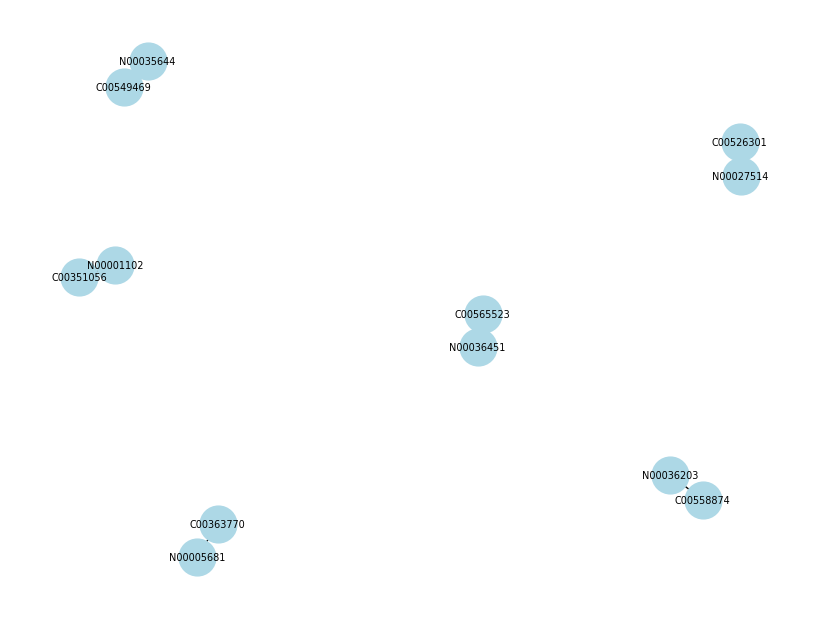

In [11]:
import networkx as nx
import matplotlib.pyplot as plt

# Create a graph from the DataFrame
G1 = nx.from_pandas_edgelist(df_network, source='cid', target='cmteid')

# Draw the network
plt.figure(figsize=(8, 6))
pos = nx.spring_layout(G1)  # Layout for visualization
nx.draw(G1, pos, with_labels=True, node_size=700, node_color='lightblue', font_size=7)

plt.show()

### PACs to PACs

In [180]:
df_pac_other22_temp = df_pac_other22[['filerid', 'recipid', 'party']]
df_pac_other22_network = df_pac_other22_temp.drop_duplicates()
df_pac_other22_network['party'] = df_pac_other22_network['party'].replace(['', ' '], 'X').fillna('X').str.strip().replace('', 'X').fillna('X')

In [184]:
len(df_pac_other22_temp.duplicated())

1014003

In [182]:
len(df_pac_other22_network)

39698

In [145]:
# df_pac_other22_network[:50]

,filerid,recipid,party
0,C00032979,C00811059,D
1,C00032979,C00740597,D
2,C00032979,C00575894,D
3,C00032979,C00498931,D
4,C00032979,C00136200,D
5,C00032979,C00732172,X
6,C00032979,C00745745,X
7,C00032979,C00495028,X
8,C00032979,C00410308,D
9,C00032979,C00370122,D


In [ ]:
df_pac_other22_network

In [146]:
# df_pac_other22_network[:250]

# Filter rows where column1 is not equal to column2
df_pac_other22_network_filtered = df_pac_other22_network[df_pac_other22_network['filerid'] != df_pac_other22_network['recipid']]
df_pac_other22_network_filtered[~df_pac_other22_network_filtered['filerid'].isna() & (df_pac_other22_network_filtered['filerid'] != '')]
df_pac_other22_network_filtered[~df_pac_other22_network_filtered['recipid'].isna() & (df_pac_other22_network_filtered['recipid'] != '')]

df_pac_other22_network_filtered.head()

,filerid,recipid,party
0,C00032979,C00811059,D
1,C00032979,C00740597,D
2,C00032979,C00575894,D
3,C00032979,C00498931,D
4,C00032979,C00136200,D


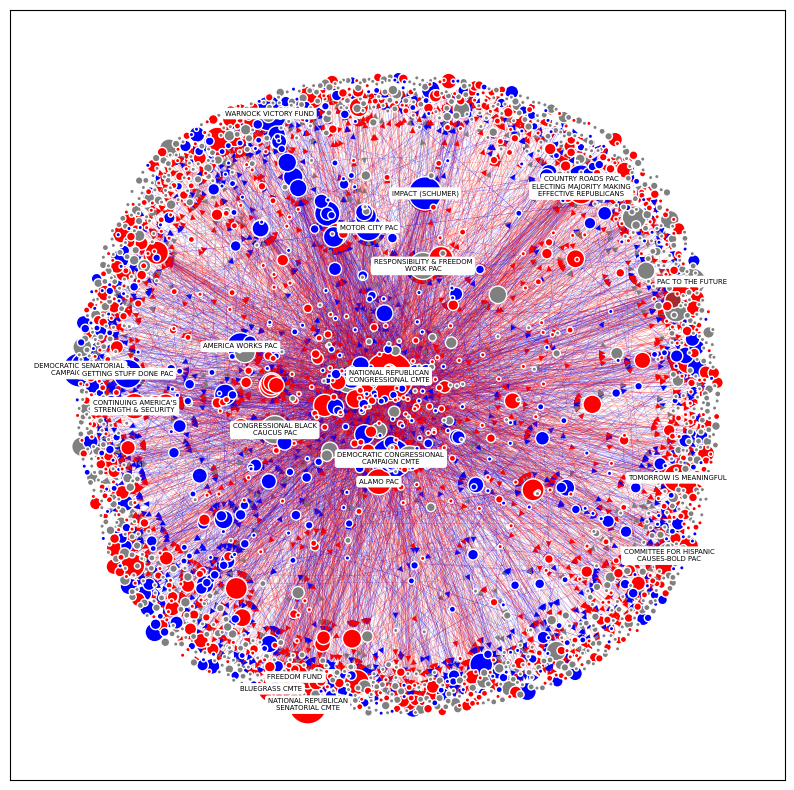

In [188]:
import matplotlib.cm as cm
import textwrap

# Wrap long labels.
def split_label(label, max_length=25):
    return textwrap.fill(label, width=max_length)

# # Make graph.
# G2 = nx.from_pandas_edgelist(df_pac_other22_network_filtered[:7500], source='filerid', target='recipid', create_using=nx.DiGraph())
# in_degrees = dict(G2.in_degree())
# nodes_sorted = sorted(G2.nodes, key=in_degrees.get, reverse=True)

# Count duplicate edges and add as weights.
df_edges = df_pac_other22_network_filtered[:7500].groupby(['filerid', 'recipid']).size().reset_index(name='weight')

# Make graph with weighted edges.
G2 = nx.from_pandas_edgelist(df_edges, source='filerid', target='recipid', edge_attr='weight', create_using=nx.DiGraph())
in_degrees = dict(G2.in_degree())
nodes_sorted = sorted(G2.nodes, key=in_degrees.get, reverse=True)

# Degree-based node size.
node_sizes_sorted = [in_degrees[node] * 10 for node in nodes_sorted]

# Top n degree labels.
label_dict = pd.Series(df_cmtes22.pacshort.values, index=df_cmtes22.cmteid).to_dict()
top_n_nodes = sorted(in_degrees, key=in_degrees.get, reverse=True)[:20]
top_n_labels = {node: split_label(label_dict[node].upper()) for node in top_n_nodes if node in label_dict}

# Party node color.
df_pac_other22['filerid'] = df_pac_other22['filerid'].fillna('X')
df_pac_other22['filerid'] = df_pac_other22['filerid'].astype(str)
color_map = {'D': 'blue', 'R': 'red', 'G': 'green', 'I': 'brown', 'X': 'gray'}
node_colors = {row['filerid']: color_map.get(row['party'], 'gray') for _, row in df_pac_other22.iterrows()}
node_color_list_sorted = [node_colors.get(str(node), 'gray') for node in nodes_sorted]

# Party edge color.
in_degree_values = [in_degrees[target] for _, target in G2.edges]
norm = plt.Normalize(vmin=min(in_degree_values), vmax=max(in_degree_values))
cmap = cm.Blues
edge_colors = [node_colors.get(str(source), 'gray') for source, _ in G2.edges]

# Node spacing.
initial_pos = {node: (0.5, 0.5) for node in top_n_nodes}
pos = nx.spring_layout(G2, pos=initial_pos, fixed=top_n_nodes, k=1.25, scale=1.5, iterations=200)

edge_widths = [G2[u][v]['weight'] * 0.1 for u, v in G2.edges]

# Draw.
plt.figure(figsize=(10, 10))
pos = nx.spring_layout(G2)
nx.draw_networkx_edges(G2, pos, width=edge_widths, edge_color=edge_colors) #0.15 width
nx.draw_networkx_nodes(G2, pos, nodelist=nodes_sorted, node_color=node_color_list_sorted, node_size=node_sizes_sorted, edgecolors='white', linewidths=1)
nx.draw_networkx_labels(G2, pos, labels=top_n_labels, font_size=5, font_color="black", bbox=dict(facecolor='white', edgecolor='none', boxstyle='round,pad=0.4'))
plt.show()

In [175]:
# duplicates = df_pac_other22_network_filtered[df_pac_other22_network_filtered.duplicated()]
# print(duplicates)

Empty DataFrame
Columns: [filerid, recipid, party]
Index: []


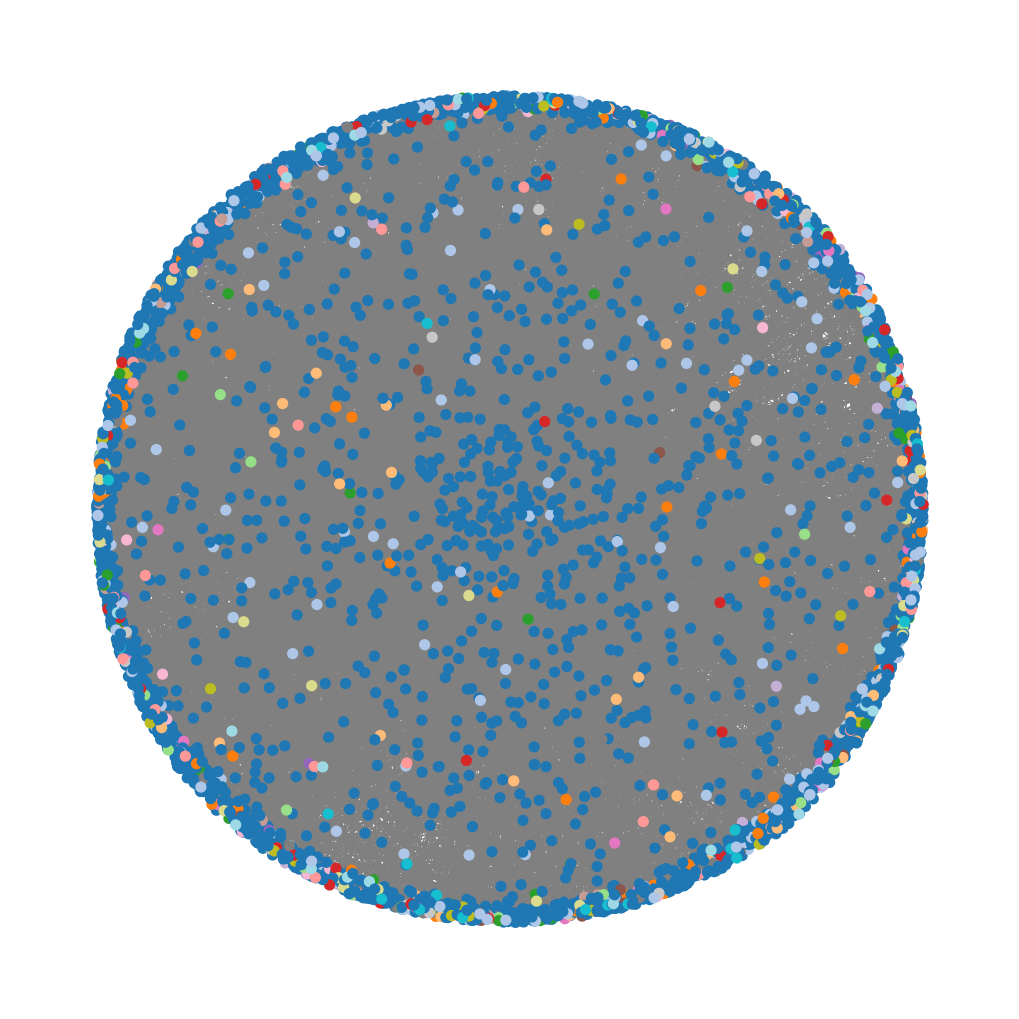

In [191]:
import itertools

C = nx.community.greedy_modularity_communities(G2)

community_colors = cm.get_cmap('tab20', len(C))
node_colors = {}

for i, community in enumerate(C):
    color = community_colors(i)
    for node in community:
        node_colors[node] = color

node_color_list = [node_colors[node] for node in G2.nodes]

plt.figure(figsize=(10, 10))
pos = nx.spring_layout(G2, k=1, scale=1, iterations=200)
nx.draw(G2, pos, node_color=node_color_list, with_labels=False, node_size=5, edge_color='gray')
plt.show()